# Task 1

In [53]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

# load image
image = ski.io.imread("hidden.png")



## Color Images and Mirroring


### Plot Color Channels as Grayscale

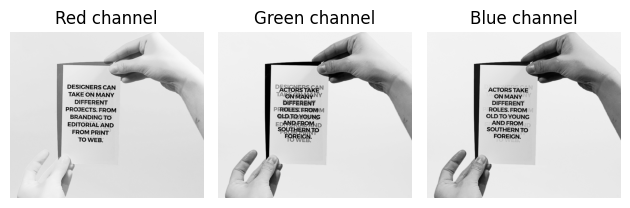

In [54]:
# get red, green, blue channels
red = image[:, :, 0]
green = image[:, :, 1]
blue = image[:, :, 2]

# plot red, green, blue channels as grayscale images
plt.subplot(1, 3, 1)
plt.imshow(red, cmap="gray")
plt.title("Red channel")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(green, cmap="gray")
plt.title("Green channel")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(blue, cmap="gray")
plt.title("Blue channel")
plt.axis("off")
plt.tight_layout()
plt.show()


### Mirror Vertical and Horizontal

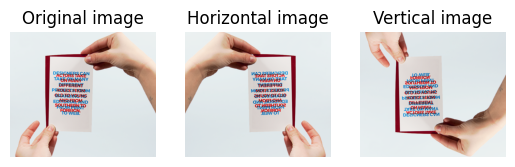

In [55]:

# mirror vertically and horizontally

vertical = np.zeros_like(image)
horizontal = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        vertical[i, j, 0] = image[image.shape[0] - i - 1, j, 0]
        vertical[i, j, 1] = image[image.shape[0] - i - 1, j, 1]
        vertical[i, j, 2] = image[image.shape[0] - i - 1, j, 2]

        horizontal[i, j, 0] = image[i, image.shape[1] - j - 1, 0]
        horizontal[i, j, 1] = image[i, image.shape[1] - j - 1, 1]
        horizontal[i, j, 2] = image[i, image.shape[1] - j - 1, 2]

# plot original image
plt.subplot(1, 3, 1)       
plt.imshow(image)
plt.title("Original image")
plt.axis("off")

# plot horizontal image
plt.subplot(1, 3, 2)
plt.imshow(horizontal)
plt.title("Horizontal image")
plt.axis("off")

# plot vertical image
plt.subplot(1, 3, 3)
plt.imshow(vertical)
plt.title("Vertical image")
plt.axis("off")
plt.show()



## Histograms, Binning and Lookup-Tables

### Function to calculate grayscale and histogram

In [56]:
def get_grayscale(image):
    """
    Convert an image to grayscale.
    :param image: input image
    :return: grayscale image
    """
    # convert to grayscale
    grayscale_image = ski.color.rgb2gray(image)
    # convert to 8-bit
    grayscale_image_8bit = (grayscale_image * 255).astype(np.uint8)
    return grayscale_image_8bit

def get_histogram(image_8bit_grayscale):
    """
    Get histogram of a grayscale image.
    :param image_8bit_grayscale: grayscale image"
    """
    # get histogram
    histogram, bin_edges = np.histogram(image_8bit_grayscale, bins=256, range=(0, 255))
    return histogram, bin_edges


### Plot Histogram

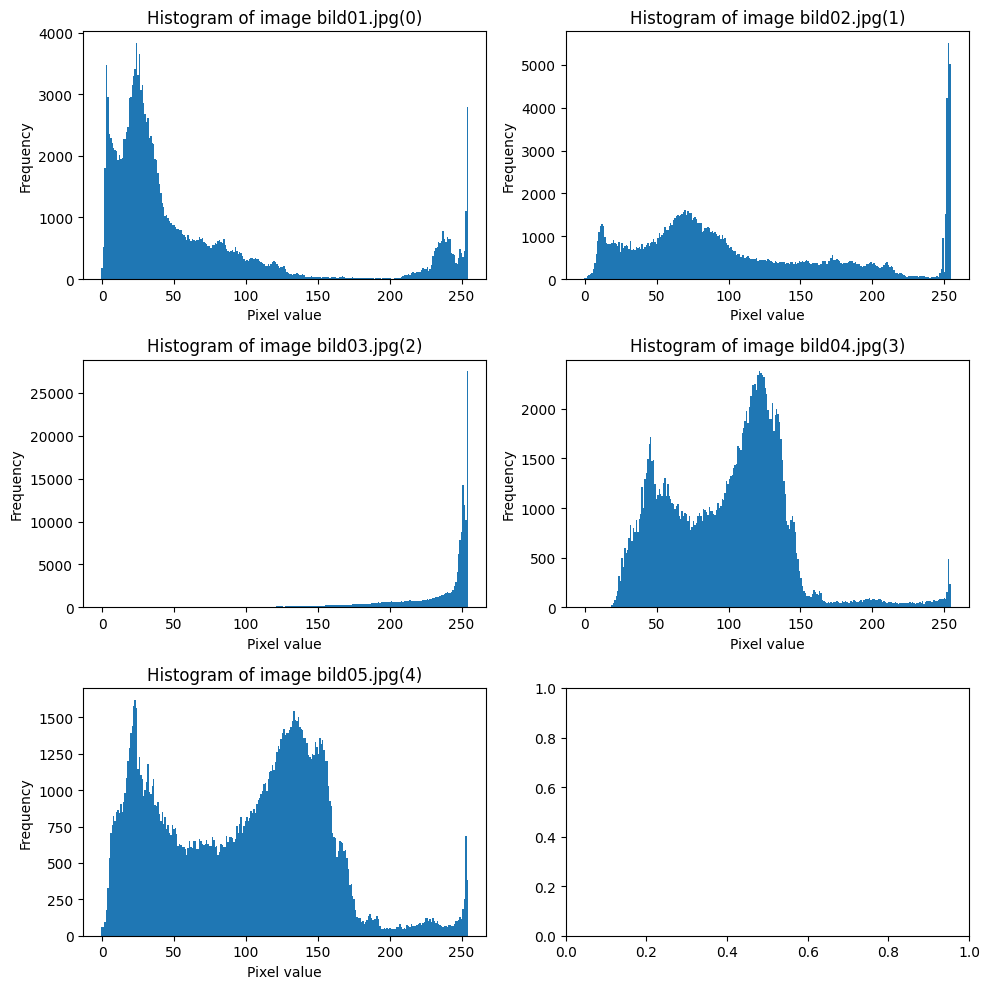

In [ ]:
images = ["bild01.jpg", "bild02.jpg", "bild03.jpg", "bild04.jpg", "bild05.jpg"]

cols = 2
rows = 3
i = 0
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for image in images:
    # get axis
    ax = axes[i // cols, i % cols]
    # load image
    rgb = ski.io.imread(image)
    # convert to grayscale
    grayscale = get_grayscale(rgb)
    # get histogram
    histogram = get_histogram(grayscale)
    # plot histogram bar plot
    ax.bar(histogram[1][:-1], histogram[0], width=1)
    ax.set_title("Histogram of image " + str(image) + "(" + str(i) + ")")
    ax.set_xlabel("Pixel value")
    ax.set_ylabel("Frequency")
    # line plot
    i += 1
fig.tight_layout()
plt.show()

**a) What kind of errors are visible for Image 1 and 3?**

1. Image 1 is extremly dark and some parts are overexposed
2. Image 2 is extremly overexposed

**b) How is the light correction of image 1 in image 2 visible in historgram and which data are lost?**

1. The Darkpart is extended to right and the light part is now thinner and has a higher rash
2. The contours of the sky are more difficult to recognise, i.e. the clouds.

**c) What was changed in image 5 from the original image 4, and how is it visible in the historgram?**

1. 